IMPORTING LIBRARIES

In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

DATA PREPROCESSING

In [365]:
data=pd.read_csv("dataset_phishing.csv")
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [366]:
data.shape

(11430, 89)

In [367]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [369]:
data.isna().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [370]:
class_map = {'legitimate':0, 'phishing':1}
data['status']=data['status'].map(class_map)

In [371]:
data.head(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


ANALYSING THE DATA

In [372]:
corr_matrix = data.corr()
corr_matrix

C:\Users\sarmi\AppData\Local\Temp\ipykernel_12452\184011309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


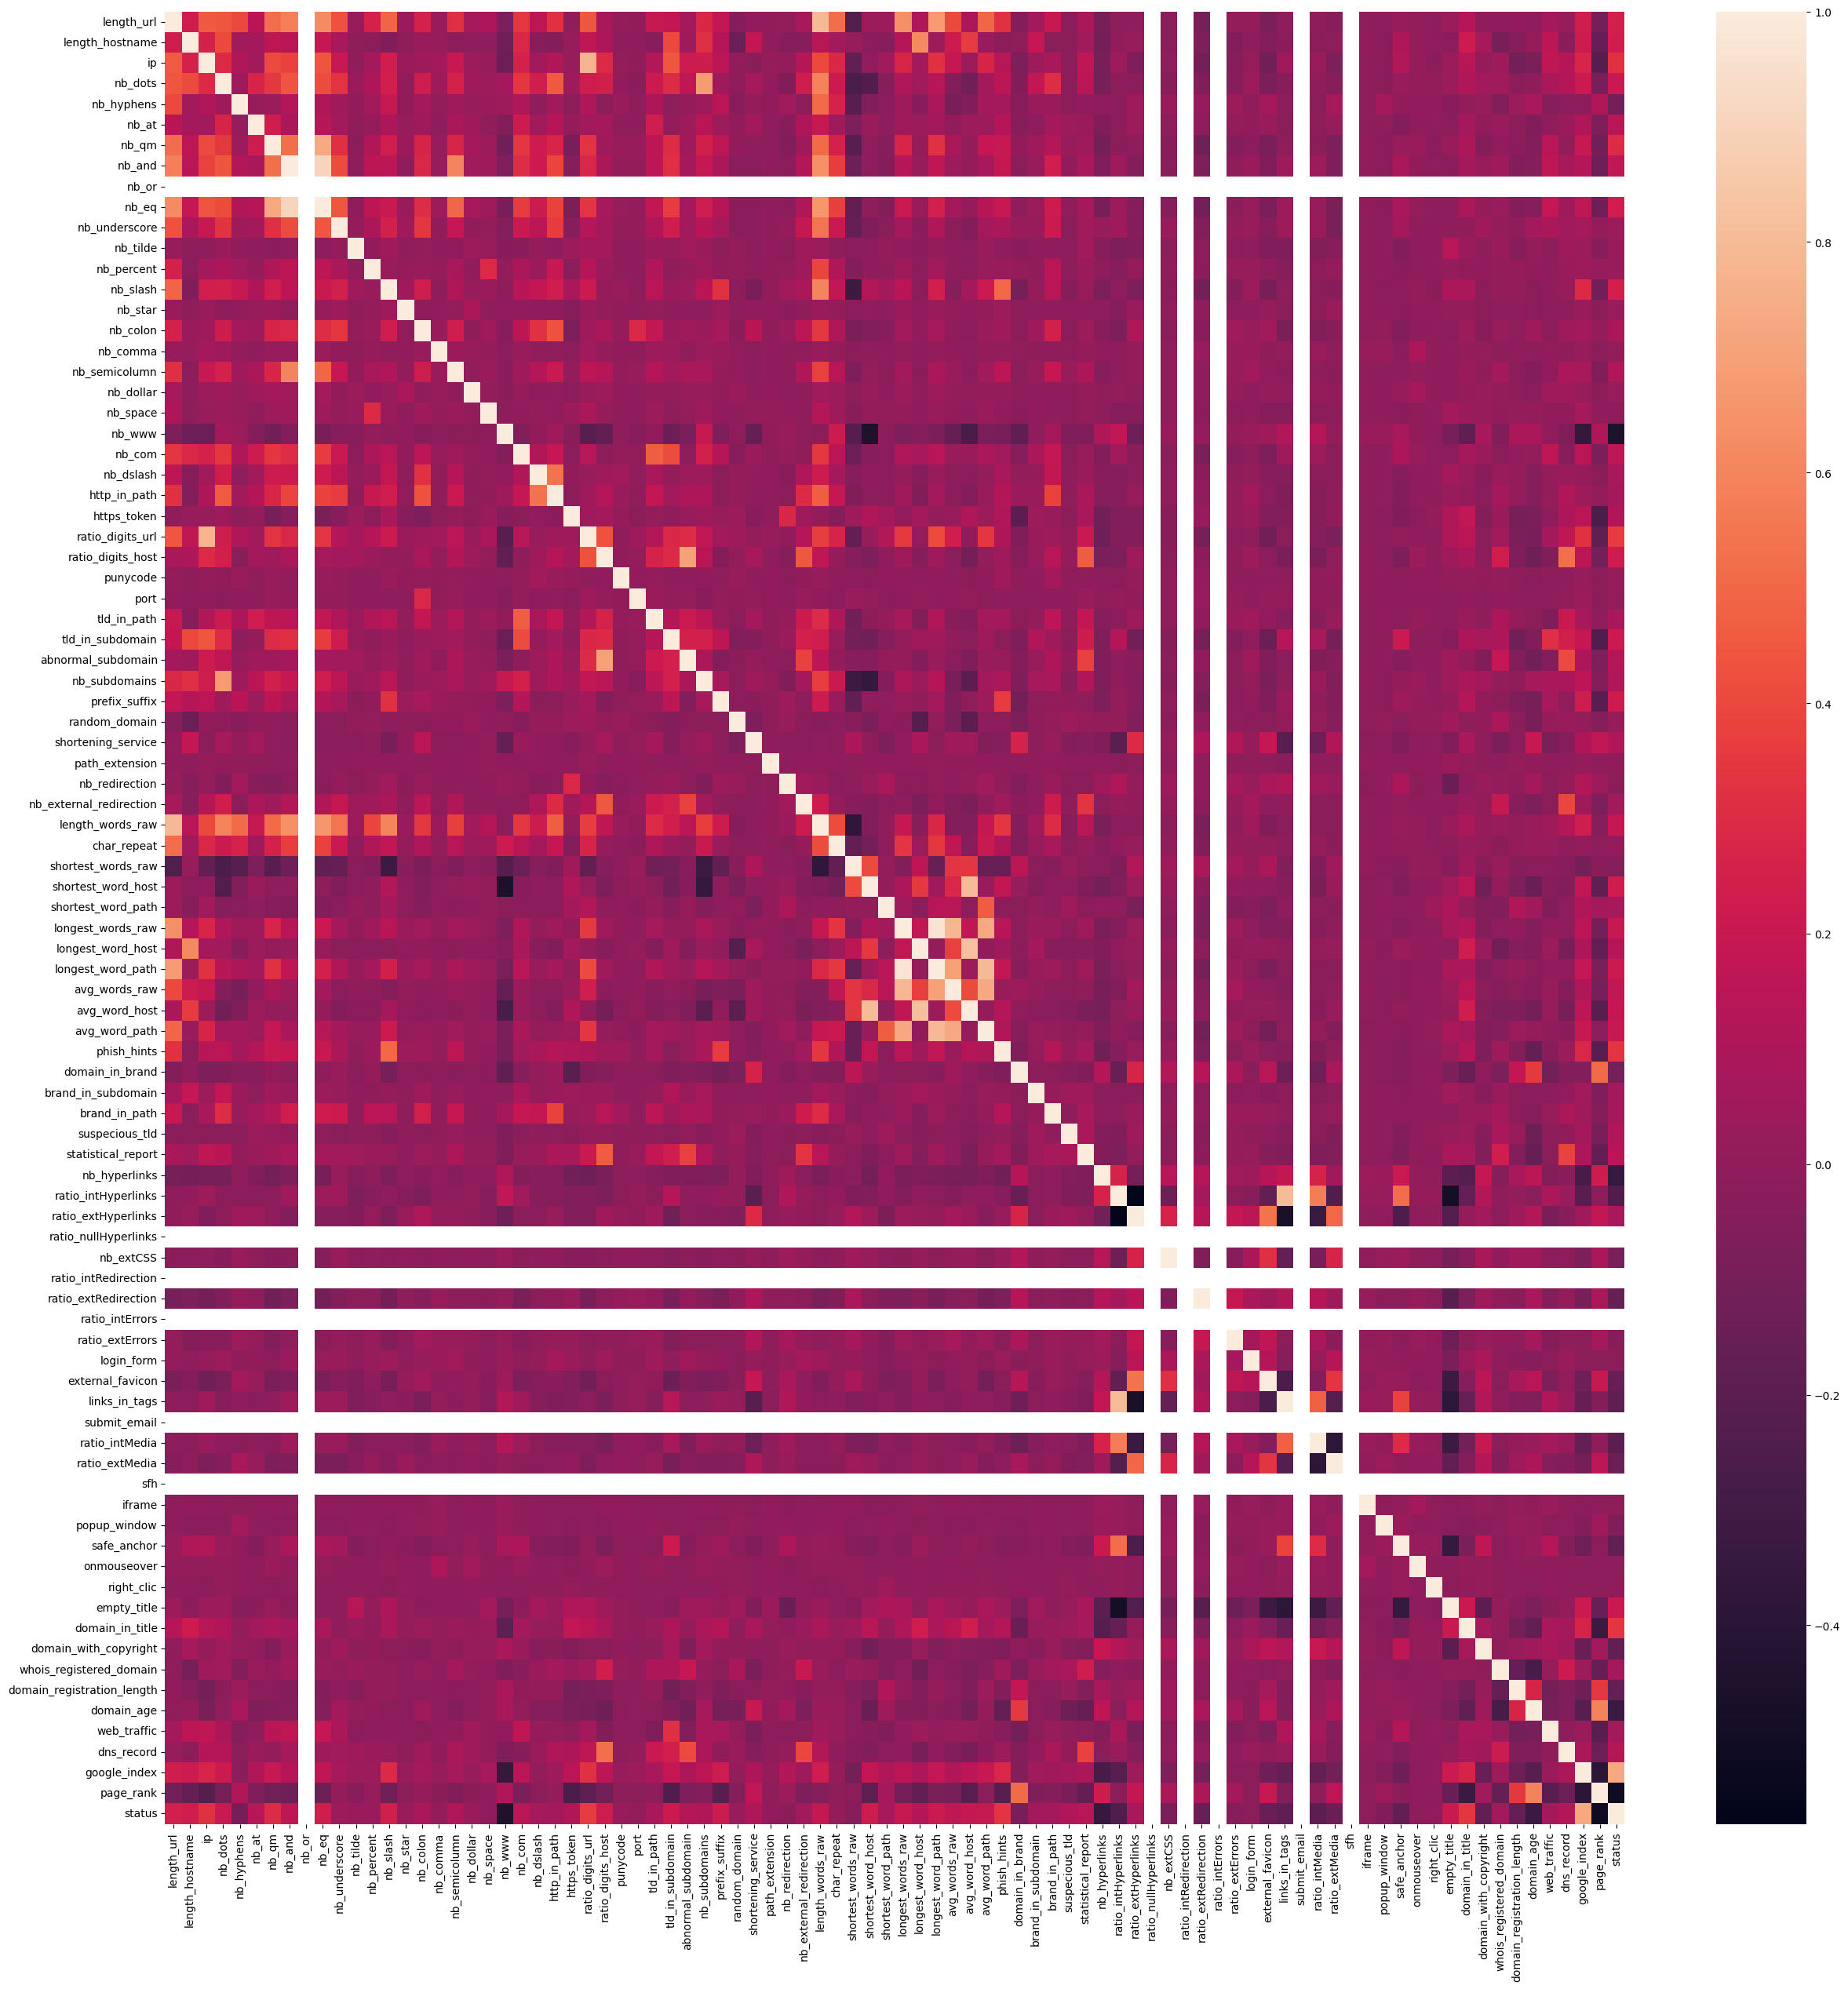

In [373]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix)
plt.show()

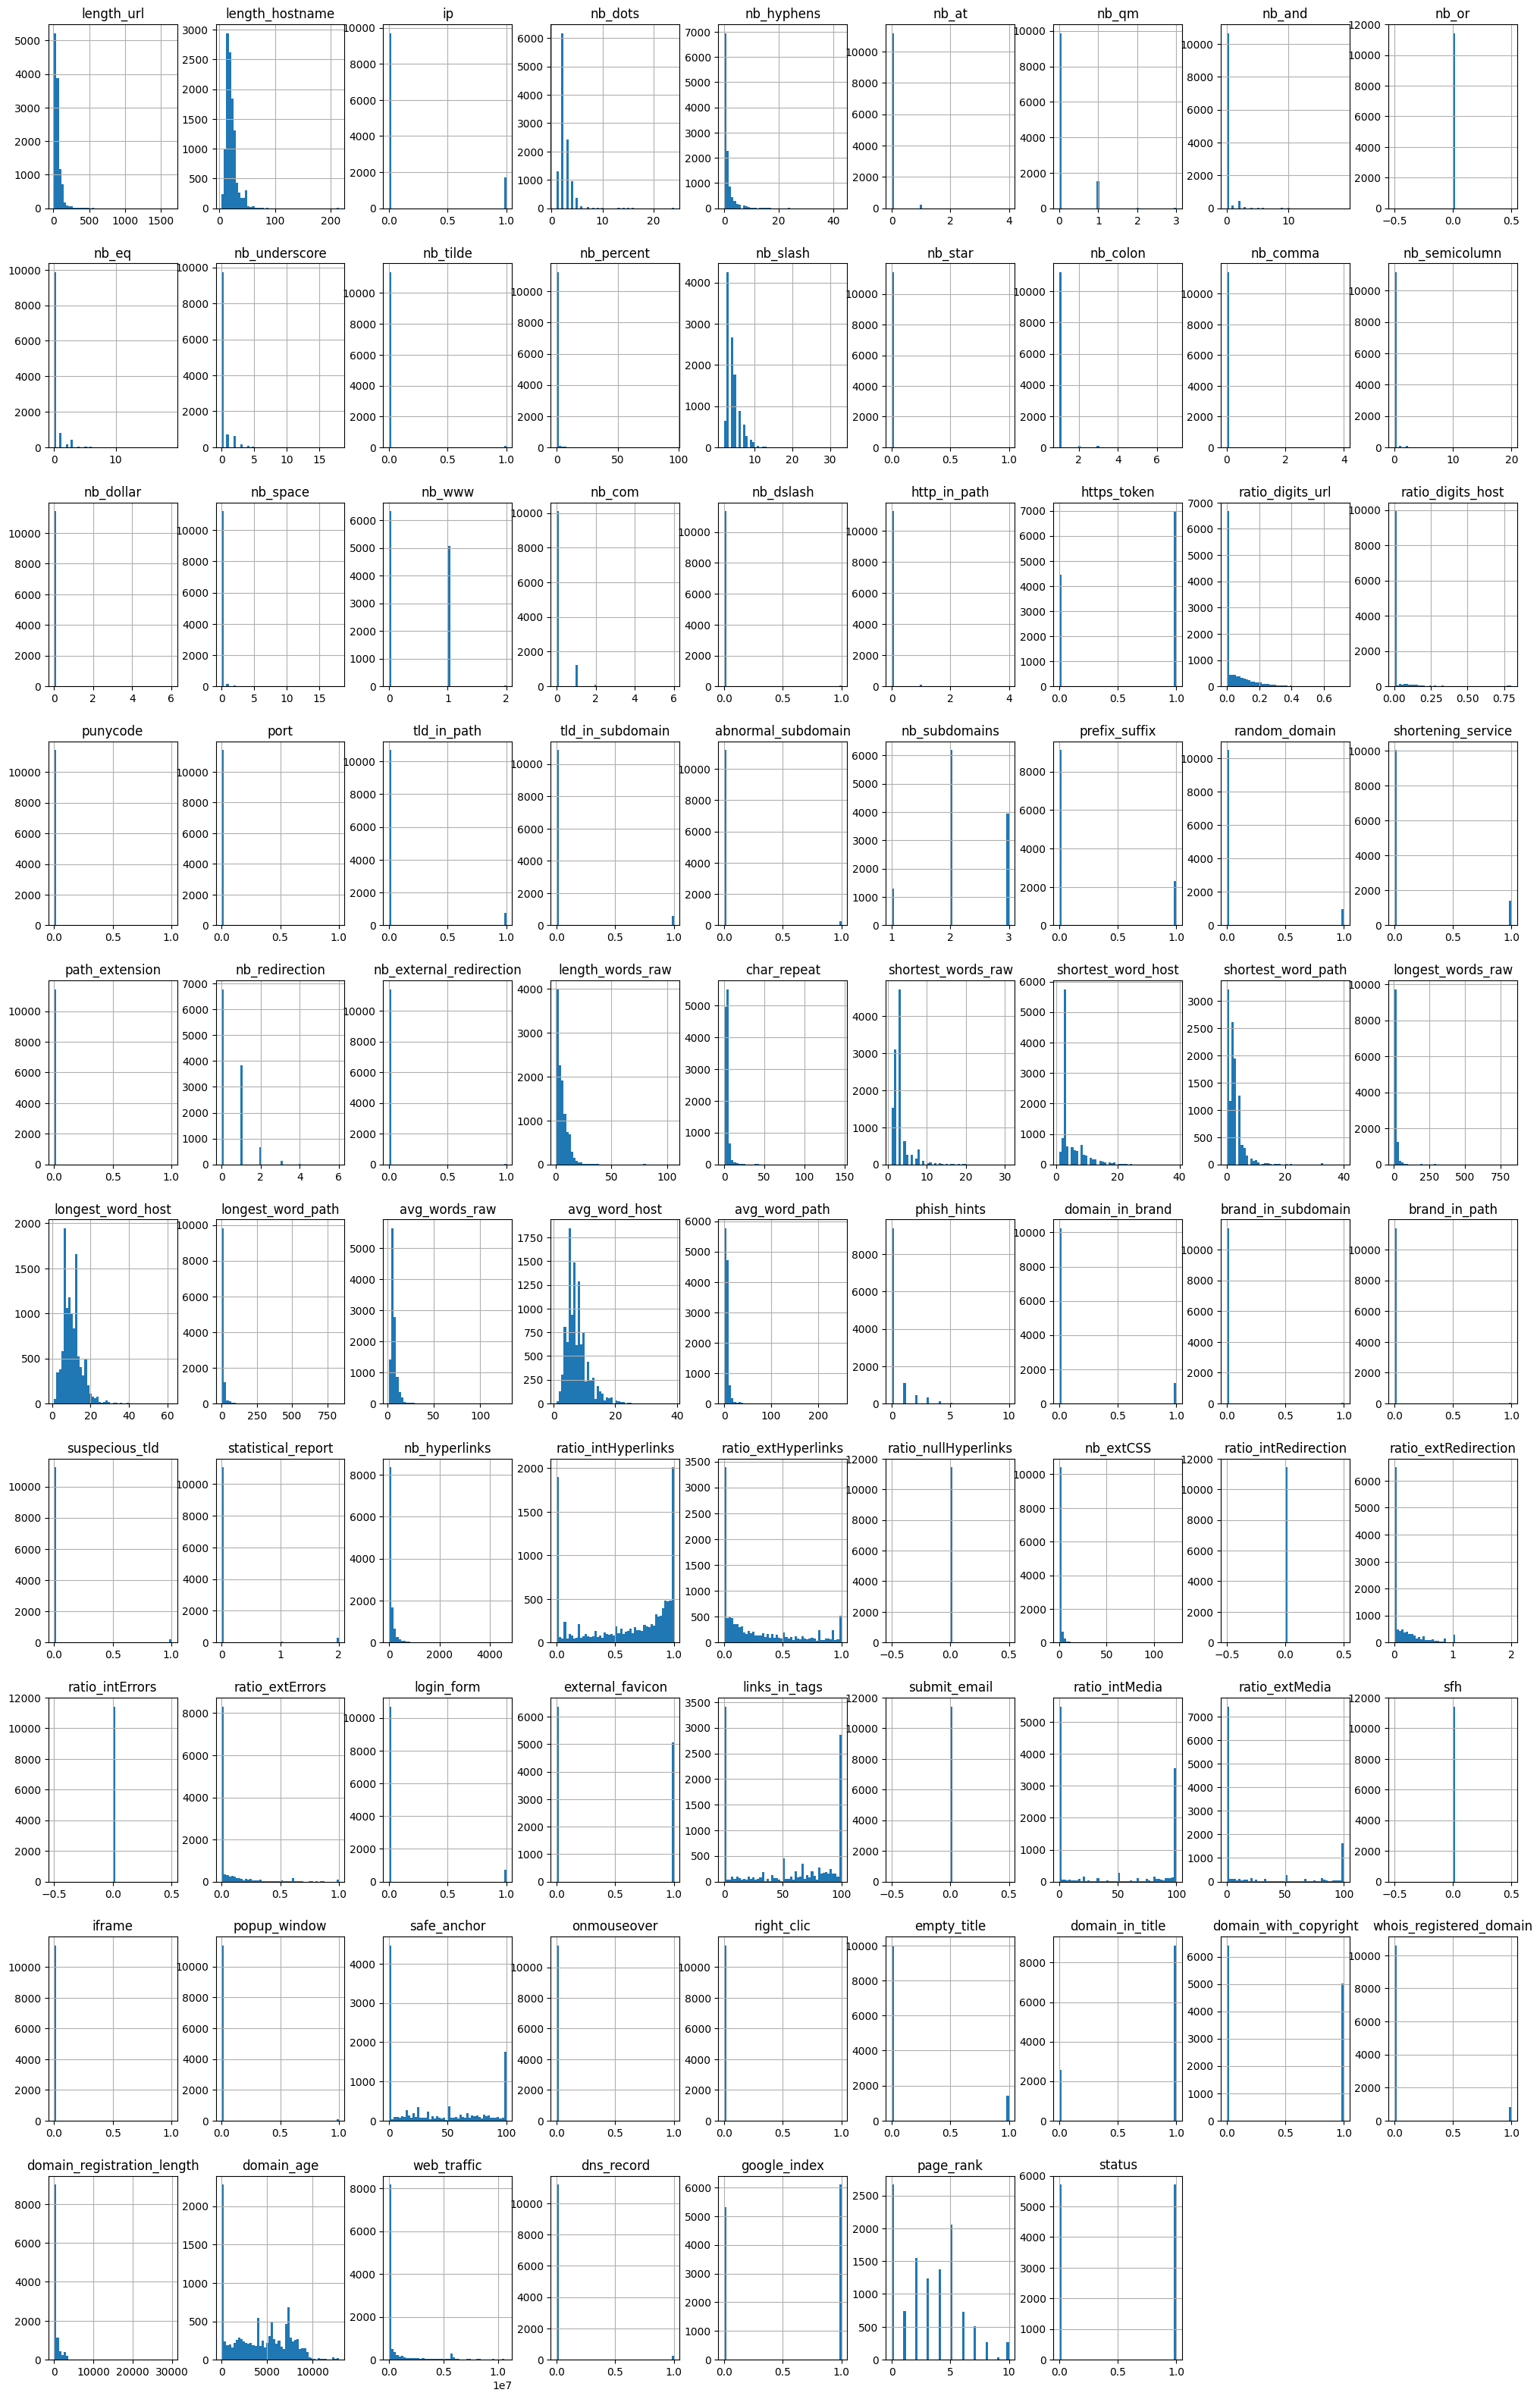

In [374]:
data.hist(bins = 50,figsize = (25,40))
plt.show()

FEATURE SELECTION

In [375]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [376]:
corr_matrix_status = corr_matrix['status']
corr_matrix_status

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [377]:
features_selected = feature_selector_correlation(corr_matrix_status, 0.2)
features_selected

[('length_url', ['0.248580']),
 ('length_hostname', ['0.238322']),
 ('ip', ['0.321698']),
 ('nb_dots', ['0.207029']),
 ('nb_qm', ['0.294319']),
 ('nb_eq', ['0.233386']),
 ('nb_slash', ['0.242270']),
 ('nb_www', ['-0.443468']),
 ('ratio_digits_url', ['0.356395']),
 ('ratio_digits_host', ['0.224335']),
 ('tld_in_subdomain', ['0.208884']),
 ('prefix_suffix', ['0.214681']),
 ('shortest_word_host', ['0.223084']),
 ('longest_words_raw', ['0.200147']),
 ('longest_word_path', ['0.212709']),
 ('phish_hints', ['0.335393']),
 ('nb_hyperlinks', ['-0.342628']),
 ('ratio_intHyperlinks', ['-0.243982']),
 ('empty_title', ['0.207043']),
 ('domain_in_title', ['0.342807']),
 ('domain_age', ['-0.331889']),
 ('google_index', ['0.731171']),
 ('page_rank', ['-0.511137']),
 ('status', ['1.000000'])]

SELECTING TARGET FEATURE AND DEPENDENT FEATURES

In [378]:
final_features = [i for (i,j) in features_selected if i != 'status']
final_features

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

In [379]:
X= data[final_features]
X

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,longest_words_raw,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,page_rank
0,37,19,0,3,0,0,3,1,0.000000,0.000000,...,11,6,0,17,0.529412,0,0,-1,1,4
1,77,23,1,1,0,0,5,0,0.220779,0.000000,...,32,32,0,30,0.966667,0,1,5767,1,2
2,126,50,1,4,1,3,5,0,0.150794,0.000000,...,17,17,0,4,1.000000,0,1,4004,1,0
3,18,11,0,2,0,0,2,0,0.000000,0.000000,...,5,0,0,149,0.973154,0,1,-1,0,3
4,55,15,0,2,0,0,5,1,0.000000,0.000000,...,11,11,0,102,0.470588,0,0,8175,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,4,1,0.000000,0.000000,...,11,11,0,199,0.884422,0,0,5396,0,6
11426,84,18,0,5,1,1,5,1,0.023810,0.000000,...,10,8,0,3,1.000000,0,1,6728,1,0
11427,105,16,1,2,1,1,5,1,0.142857,0.000000,...,15,15,0,68,0.470588,0,0,8515,1,10
11428,38,30,0,2,0,0,3,1,0.000000,0.000000,...,22,0,0,32,0.375000,0,1,2836,0,4


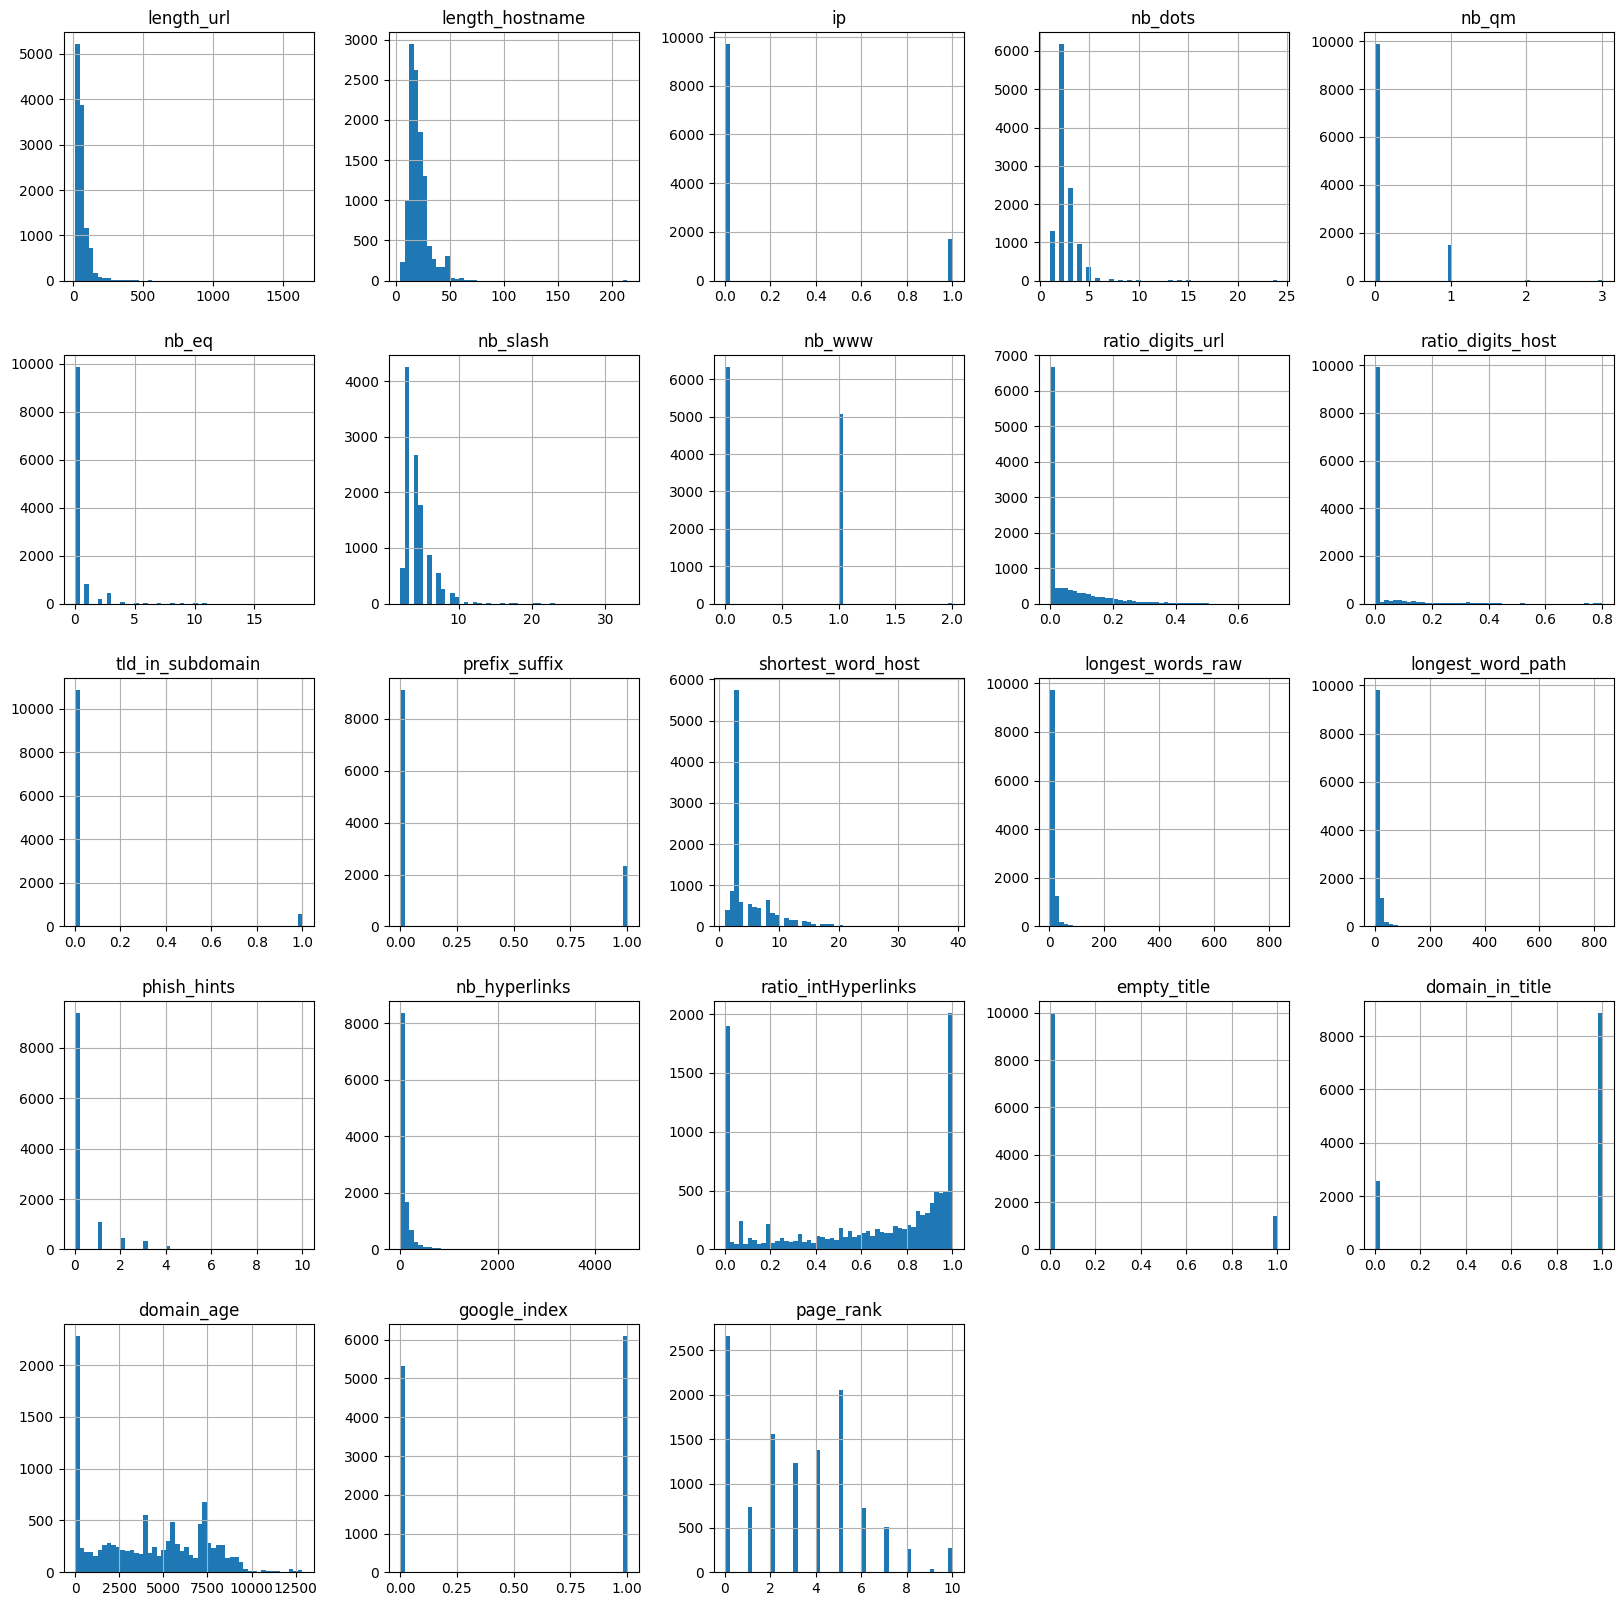

In [380]:
X.hist(bins = 50,figsize = (20,20))
plt.show()

In [381]:
Y=data['status']
Y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

TRAIN TEST SPLITTING

In [382]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8,random_state=42,shuffle = True)

LOGISTIC REGRESSION

In [383]:
def lr():
    model=LogisticRegression(max_iter=300) #max_iter is max. no. of epochs/iterations
    model.fit(X_train,Y_train)
    y_predict_train=model.predict(X_train)
    y_predict_test=model.predict(X_test)
    print("TRAINING ACCURACY: ",accuracy_score(Y_train,y_predict_train)*100)
    print("TESTING ACCURACY: ",accuracy_score(Y_test,y_predict_test)*100)

In [384]:
lr()

TRAINING ACCURACY:  93.12117235345582
TESTING ACCURACY:  93.74453193350831


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM

In [385]:
def svm_func():
    model=SVC(kernel='rbf',gamma=0.0001,C=1) #gamma denotes the curvature, more gamma means more curvature and vice versa. C denotes error control, high C means high error and vice versa
    model.fit(X_train,Y_train)
    y_predict_train=model.predict(X_train)
    y_predict_test=model.predict(X_test)
    print("TRAINING ACCURACY: ",accuracy_score(Y_train,y_predict_train)*100)
    print("TESTING ACCURACY: ",accuracy_score(Y_test,y_predict_test)*100)

In [386]:
svm_func()

TRAINING ACCURACY:  86.89851268591427
TESTING ACCURACY:  85.08311461067368


NAIVE BAYES

In [387]:
def nb():
    model=BernoulliNB()
    model.fit(X_train,Y_train)
    y_predict_train=model.predict(X_train)
    y_predict_test=model.predict(X_test)
    print("TRAINING ACCURACY: ",accuracy_score(Y_train,y_predict_train)*100)
    print("TESTING ACCURACY: ",accuracy_score(Y_test,y_predict_test)*100)

In [388]:
nb()

TRAINING ACCURACY:  88.00306211723534
TESTING ACCURACY:  88.80139982502187


KNN CLASSIFIER

In [389]:
def knc():
    model=KNeighborsClassifier(n_neighbors=4,weights='distance') #n_neighbors is no. of nearest neighbors to be considered. weights='distance' means weightage given on the basis of distance to neighbors
    model.fit(X_train,Y_train)
    y_predict_train=model.predict(X_train)
    y_predict_test=model.predict(X_test)
    print("TRAINING ACCURACY: ",accuracy_score(Y_train,y_predict_train)*100)
    print("TESTING ACCURACY: ",accuracy_score(Y_test,y_predict_test)*100)

In [390]:
knc()

TRAINING ACCURACY:  100.0
TESTING ACCURACY:  88.36395450568679


DECISION TREE CLASSIFIER

In [391]:
def dtc():
    model=DecisionTreeClassifier(max_depth=8,random_state=42)
    model.fit(X_train,Y_train)
    y_predict_train=model.predict(X_train)
    y_predict_test=model.predict(X_test)
    print("TRAINING ACCURACY: ",accuracy_score(Y_train,y_predict_train)*100)
    print("TESTING ACCURACY: ",accuracy_score(Y_test,y_predict_test)*100)
    plot_tree(model)

TRAINING ACCURACY:  95.90988626421696
TESTING ACCURACY:  94.26946631671042


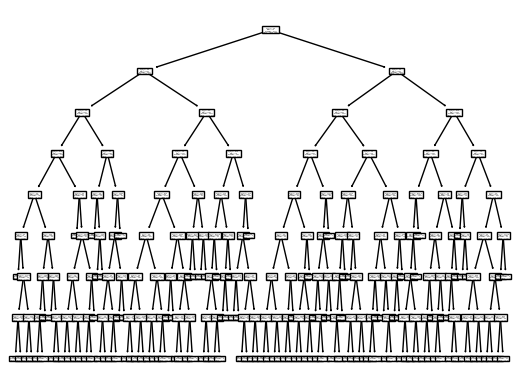

In [392]:
dtc()

RANDOM FOREST CLASSIFIER

In [393]:
def rfc():
    model=RandomForestClassifier(n_estimators=50,random_state=42)
    model.fit(X_train,Y_train)
    y_predict_train=model.predict(X_train)
    y_predict_test=model.predict(X_test)
    print("TRAINING ACCURACY: ",accuracy_score(Y_train,y_predict_train)*100)
    print("TESTING ACCURACY: ",accuracy_score(Y_test,y_predict_test)*100)

In [394]:
rfc()

TRAINING ACCURACY:  100.0
TESTING ACCURACY:  96.50043744531933


ADABOOST CLASSIFIER

In [439]:
def ac():
    model=AdaBoostClassifier(n_estimators=90,random_state=42)
    model.fit(X_train,Y_train)
    y_predict_train=model.predict(X_train)
    y_predict_test=model.predict(X_test)
    print("TRAINING ACCURACY: ",accuracy_score(Y_train,y_predict_train)*100)
    print("TESTING ACCURACY: ",accuracy_score(Y_test,y_predict_test)*100)

In [440]:
ac()

TRAINING ACCURACY:  95.1334208223972
TESTING ACCURACY:  94.48818897637796


In [445]:
dict={'MODEL':['Logistic Regression','SVM','Naive Bayes','KNeighbors Classifier','Decision Tree','Random Forest','AdaBoost'],
      'TRAINING ACCURACY':[93.121,86.899,88.003,100.000,95.910,100.000,95.133],
      'TESTING ACCURACY':[93.745,85.083,88.801,88.364,94.269,96.500,94.488]}
final_df=pd.DataFrame(dict)
final_df.sort_values('TESTING ACCURACY',ascending=False,inplace=True)
final_df

,MODEL,TRAINING ACCURACY,TESTING ACCURACY
5,Random Forest,100.000,96.500
6,AdaBoost,95.133,94.488
4,Decision Tree,95.910,94.269
0,Logistic Regression,93.121,93.745
2,Naive Bayes,88.003,88.801
3,KNeighbors Classifier,100.000,88.364
1,SVM,86.899,85.083


THEREFORE, RANDOM FOREST GIVES THE HIGHEST ACCURACY OF 96.5% IN TERMS OF TESTING DATA.